# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
import numpy as np
import pandas as pd

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df0 = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


To identify data properties such as means, median, max, min, data type, and other things.

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
df = df0.copy()
print(df.shape)
print(df.info())

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
df.drop_duplicates()
print(df.isna().sum())

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


Use `.describe()`.

In [5]:
# Use .describe()

df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [6]:
# Check the format of the data
df.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [7]:
# Convert datetime columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [8]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) / np.timedelta64(1,'m')

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

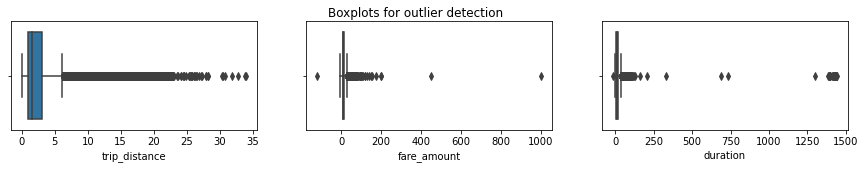

In [10]:
fig, axes = plt.subplots(1, 3, figsize = (15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax = axes[0], x = df['trip_distance'])
sns.boxplot(ax = axes[1], x = df['fare_amount'])
sns.boxplot(ax = axes[2], x = df['duration'])
plt.show();

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [11]:
# Are trip distances of 0 bad data or very short trips rounded down?

# Sort the column values, eliminate duplicates, and inspect the least 10 values
unique_sorted_values = df['trip_distance'].drop_duplicates().sort_values()

# Get the least 10 values
least_10_values = unique_sorted_values.head(10)

# Display the least 10 values
print("Least 10 unique sorted values:")
print(least_10_values)

# Check if the values are rounded or precise
is_rounded = all(value.is_integer() for value in least_10_values)
if is_rounded:
    print("The values are rounded.")
else:
    print("The values are precise.")

Least 10 unique sorted values:
128      0.00
2985     0.01
323      0.02
3158     0.03
1510     0.04
10146    0.05
4423     0.06
922      0.07
4623     0.08
22035    0.09
Name: trip_distance, dtype: float64
The values are precise.


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [12]:
# Calculate the count of rides where trip_distance is zero
count_zero_distance = (df['trip_distance'] == 0).sum()

# Display the count
print(f"Count of rides where trip_distance is zero: {count_zero_distance}")

Count of rides where trip_distance is zero: 148


#### `fare_amount` outliers

In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)]

# Display the outliers
print('lower_bound : ',  lower_bound)
print('upper_bound : ',  upper_bound)
print("Outliers in fare_amount:")
print(outliers['fare_amount'].unique())

lower_bound :  -5.5
upper_bound :  26.5
Outliers in fare_amount:
[  47.5    52.     68.25   80.     40.5    31.5    32.5    28.     30.5
   39.     34.5    31.     39.5    51.5    71.5    69.5    42.5    29.
   55.     53.     45.     45.5    78.     41.     27.     28.5    32.
   41.5    34.     38.5    35.5    49.5    27.5    36.     43.     33.
   43.5   100.     30.     42.     40.     47.     35.     44.5    29.5
   36.5    66.     59.     46.     64.     33.5    37.5    50.     63.
   72.5   120.     38.     37.     73.     58.     57.     60.     75.
   61.5    85.5    75.5   152.     44.     50.5    51.     46.5    57.5
   48.     80.84   68.     65.5    70.     67.5    63.5    76.    107.
   48.5    93.75   54.7    64.5    98.5    74.     71.     49.     62.5
  999.99   56.5    58.5    65.     67.    150.     61.    131.     59.5
   99.5    56.     99.     29.7    77.2   175.   -120.     52.5   105.
  200.01   77.     55.5    70.5    72.    200.    140.     79.5    54.5
   62.

**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [14]:
# Impute values less than $0 with 0
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].describe()

count    22699.000000
mean        13.033832
std         13.212462
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [15]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print

#### `duration` outliers


In [16]:
# Call .describe() for duration outliers
outlier_imputer(['fare_amount'], 6)
outlier_imputer(['duration'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64
duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [17]:
# Impute a 0 for any negative values
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].describe()

count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64

In [18]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [19]:
# Create `pickup_dropoff` column

# Step 1: Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [20]:
# Step 2: Calculate mean distance for each pickup_dropoff group
mean_distance = df.groupby('pickup_dropoff')['trip_distance'].mean().reset_index()
mean_distance.columns = ['pickup_dropoff', 'mean_distance']

# Step 3: Merge the mean distance back into the original DataFrame
df = df.merge(mean_distance, on = 'pickup_dropoff', how = 'left')

# Display the updated DataFrame
print("Updated DataFrame with mean_distance:")
print(df['pickup_dropoff'])

Updated DataFrame with mean_distance:
0        100 231
1         186 43
2        262 236
3         188 97
4          4 112
          ...   
22694     48 186
22695    132 164
22696    107 234
22697     68 144
22698    239 236
Name: pickup_dropoff, Length: 22699, dtype: object


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [21]:
# 1. Convert `grouped` to a dictionary

# Step 4: Convert the mean_distance DataFrame to a dictionary
grouped_dict = {'trip_distance': mean_distance.set_index('pickup_dropoff')['mean_distance'].to_dict()}

# 2. Reassign to only contain the inner dictionary

# Step 5: Reassign grouped_dict to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

# Display the resulting dictionary
print("Grouped Dictionary:")
print(df['pickup_dropoff'])

Grouped Dictionary:
0        100 231
1         186 43
2        262 236
3         188 97
4          4 112
          ...   
22694     48 186
22695    132 164
22696    107 234
22697     68 144
22698    239 236
Name: pickup_dropoff, Length: 22699, dtype: object


1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [22]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked

# Display the updated DataFrame
print("Updated DataFrame with mean_distance:")
df[(df['PULocationID'] == 100) & (df['DOLocationID'] == 231)][['mean_distance']]

Updated DataFrame with mean_distance:


,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [23]:
mean_duration = df.groupby('pickup_dropoff')['duration'].mean().reset_index()
mean_duration.columns = ['pickup_dropoff', 'mean_duration']

mean_duration_dict = mean_duration.set_index('pickup_dropoff')['mean_duration'].to_dict()

df['mean_duration'] = df['pickup_dropoff']

df['mean_duration'] = df['mean_duration'].map(mean_duration_dict)

# Confirm that it worked
print("Updated DataFrame with mean_duration:")
df[(df['PULocationID'] == 100) & (df['DOLocationID'] == 231)][['mean_duration']]

Updated DataFrame with mean_duration:


,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [24]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [25]:
# Create 'rush_hour' col

df['rush_hour'] = ((df['tpep_pickup_datetime'].dt.dayofweek < 5) &  # Weekday (0-4)
                    ((df['tpep_pickup_datetime'].dt.hour >= 6) & (df['tpep_pickup_datetime'].dt.hour < 10) |  # 06:00–10:00
                     (df['tpep_pickup_datetime'].dt.hour >= 16) & (df['tpep_pickup_datetime'].dt.hour < 20)))  # 16:00–20:00

# If day is Saturday or Sunday, impute 0 in `rush_hour` column

df['rush_hour'] = df['rush_hour'].astype(int)

In [26]:
df['rush_hour']

0        0
1        0
2        1
3        0
4        0
        ..
22694    1
22695    0
22696    0
22697    0
22698    0
Name: rush_hour, Length: 22699, dtype: int64

In [27]:
# Apply the `rush_hourizer()` function to the new column
def rush_hourizer(value):
    # Here you can add any additional logic if needed
    return value  # For now, it just returns the same value

df['rush_hour'] = df['rush_hour'].apply(rush_hourizer)

### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

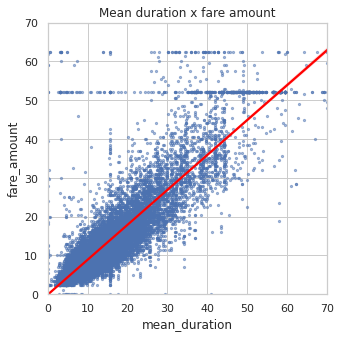

In [28]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style = 'whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x = df['mean_duration'], y = df['fare_amount'],
            scatter_kws = {'alpha':0.5, 's':5},
            line_kws = {'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [29]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [30]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df[df['fare_amount'] == 52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,Sunday,March,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,Saturday,June,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,Saturday,November,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,Wednesday,December,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,Sunday,September,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,Tuesday,February,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,Monday,June,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,Thursday,August,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,Tuesday,September,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,Sunday,April,0


**Question:** What do you notice about the first 30 trips?

All of them eqaul 52.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [32]:
data_cleaned = df.drop(columns = ['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
                                'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 
                                'PULocationID', 'DOLocationID', 'payment_type', 
                                'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
                                'improvement_surcharge', 'total_amount', 'tpep_dropoff_datetime', 
                                'tpep_pickup_datetime', 'duration', 'pickup_dropoff',
                                'day', 'month'], axis = 1)  # Replace with actual feature names
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

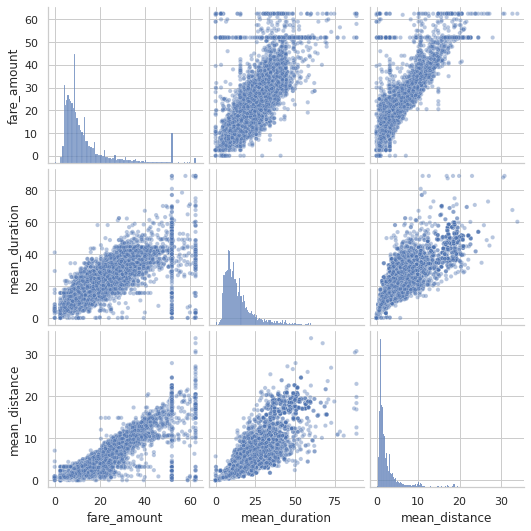

In [33]:
# Create a pairplot to visualize pairwise relationships between variables in the data

sns.pairplot(data_cleaned[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws = {'alpha':0.4, 'size':5},
             );

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [34]:
# Correlation matrix to help determine most correlated variables

correlation_matrix = data_cleaned.corr()

Visualize a correlation heatmap of the data.

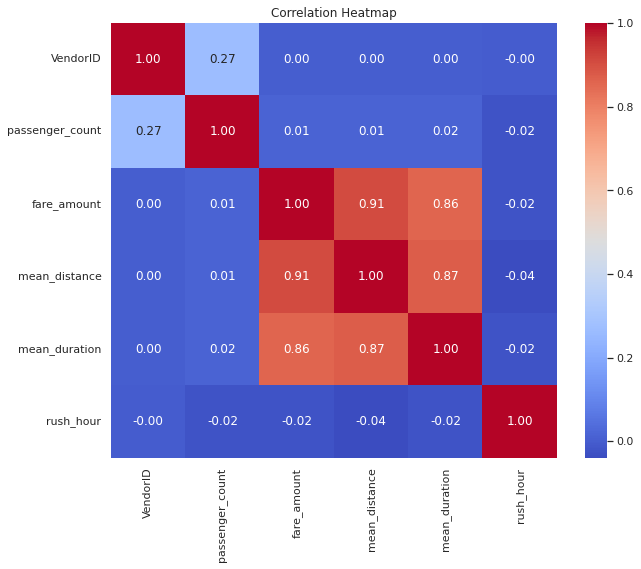

In [35]:
# Create correlation heatmap

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [36]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [37]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
X = data_cleaned.drop(columns = 'fare_amount')  # Replace 'fare_amount' with your actual target variable name

# Set y variable
y = data_cleaned['fare_amount']  # Again, replace 'fare_amount' with your actual target variable name

# Display first few rows
print(X.head())
print(y.head())

   VendorID  passenger_count  mean_distance  mean_duration  rush_hour
0         2                6       3.521667      22.847222          0
1         1                1       3.108889      24.470370          0
2         1                1       0.881429       7.250000          1
3         2                1       3.700000      30.250000          0
4         2                1       4.435000      14.616667          0
0    13.0
1    16.0
2     6.5
3    20.5
4    16.5
Name: fare_amount, dtype: float64


### Task 8b. Pre-process data


Dummy encode categorical variables

In [38]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies for VendorID
X = pd.get_dummies(X, drop_first = True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [39]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [40]:
# Standardize the X variables

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### Fit the model

Instantiate your model and fit it to the training data.

In [41]:
# Fit your model to the training data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [42]:
# Evaluate the model performance on the training data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model performance on the training data
y_train_pred = model.predict(X_train_scaled)

# Calculate metrics for training data
rss_train = ((y_train - y_train_pred) ** 2).sum()  # Residual Sum of Squares
r2_train = r2_score(y_train, y_train_pred)  # Explained Variance Score
mae_train = mean_absolute_error(y_train, y_train_pred)  # Mean Absolute Error
mse_train = mean_squared_error(y_train, y_train_pred)  # Mean Squared Error
rmse_train = mean_squared_error(y_train, y_train_pred, squared = False)  # Root Mean Squared Error

# Print the results for training data
print(f"Training Data - Residual Sum of Squares (RSS): {rss_train}")
print(f"Training Data - Explained Variance Score (R²): {r2_train}")
print(f"Training Data - Mean Absolute Error (MAE): {mae_train}")
print(f"Training Data - Mean Squared Error (MSE): {mse_train}")
print(f"Training Data - Root Mean Squared Error (RMSE): {rmse_train}")

Training Data - Residual Sum of Squares (RSS): 324859.6608840636
Training Data - Explained Variance Score (R²): 0.8398434585044773
Training Data - Mean Absolute Error (MAE): 2.186666416775414
Training Data - Mean Squared Error (MSE): 17.88973296349268
Training Data - Root Mean Squared Error (RMSE): 4.229625629236313


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [43]:
# Scale the X_test data

X_test_scaled = scaler.transform(X_test)

In [44]:
# Evaluate the model performance on the testing data

# Evaluate the model performance on the testing data
y_test_pred = model.predict(X_test_scaled)

# Calculate metrics for testing data
rss_test = ((y_test - y_test_pred) ** 2).sum()  # Residual Sum of Squares
r2_test = r2_score(y_test, y_test_pred)  # Explained Variance Score
mae_test = mean_absolute_error(y_test, y_test_pred)  # Mean Absolute Error
mse_test = mean_squared_error(y_test, y_test_pred)  # Mean Squared Error
rmse_test = mean_squared_error(y_test, y_test_pred, squared = False)  # Root Mean Squared Error

# Print the results for testing data
print(f"Testing Data - Residual Sum of Squares (RSS): {rss_test}")
print(f"Testing Data - Explained Variance Score (R²): {r2_test}")
print(f"Testing Data - Mean Absolute Error (MAE): {mae_test}")
print(f"Testing Data - Mean Squared Error (MSE): {mse_test}")
print(f"Testing Data - Root Mean Squared Error (RMSE): {rmse_test}")

Testing Data - Residual Sum of Squares (RSS): 65042.1018727752
Testing Data - Explained Variance Score (R²): 0.8682583641795454
Testing Data - Mean Absolute Error (MAE): 2.1336549840593864
Testing Data - Mean Squared Error (MSE): 14.326454156998944
Testing Data - Root Mean Squared Error (RMSE): 3.785030271609323


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [45]:
# Create a `results` dataframe

results = pd.DataFrame({
    'actual': y_test,
    'predicted': y_test_pred,
    'residuals': y_test - y_test_pred
})

# Display the results DataFrame
print(results.head())

       actual  predicted  residuals
5818     14.0  12.356503   1.643497
18134    28.0  16.314595  11.685405
4655      5.5   6.726789  -1.226789
7378     15.5  16.227206  -0.727206
13914     9.5  10.536408  -1.036408


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

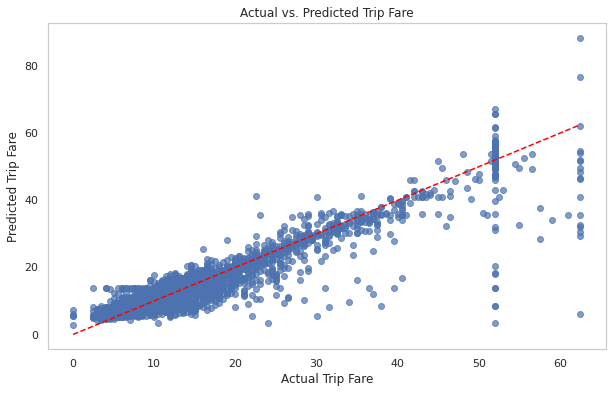

In [46]:
# Create a scatterplot to visualize `predicted` over `actual`

plt.figure(figsize = (10, 6))
plt.scatter(results['actual'], results['predicted'], alpha = 0.7)
plt.plot([results['actual'].min(), results['actual'].max()], 
         [results['actual'].min(), results['actual'].max()], 
         color = 'red', linestyle = '--')  # Line for perfect prediction
plt.title('Actual vs. Predicted Trip Fare')
plt.xlabel('Actual Trip Fare')
plt.ylabel('Predicted Trip Fare')
plt.grid()
plt.show()

Visualize the distribution of the `residuals` using a histogram.

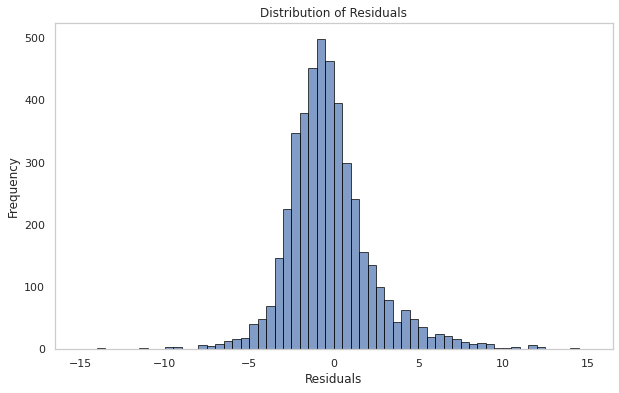

In [53]:
# Visualize the distribution of the `residuals`

plt.figure(figsize = (10, 6))
plt.hist(results['residuals'], bins = np.arange(-15,15.5,0.5), edgecolor = 'black', alpha = 0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [48]:
# Calculate residual mean

residual_mean = results['residuals'].mean()
print(f'Mean of Residuals: {residual_mean}')

Mean of Residuals: -0.01544262152868053


Create a scatterplot of `residuals` over `predicted`.

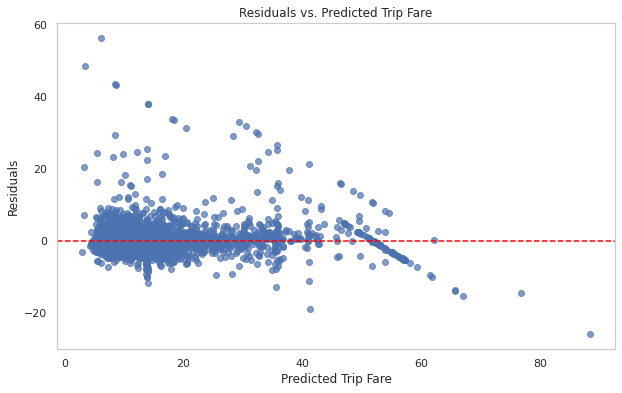

In [49]:
# Create a scatterplot of `residuals` over `predicted`

plt.figure(figsize = (10, 6))
plt.scatter(results['predicted'], results['residuals'], alpha = 0.7)
plt.axhline(0, color = 'red', linestyle = '--')  # Line for zero residual
plt.title('Residuals vs. Predicted Trip Fare')
plt.xlabel('Predicted Trip Fare')
plt.ylabel('Residuals')
plt.grid()
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [50]:
# Output the model's coefficients
coefficients = model.coef_
features = X_train.columns  # Assuming you have the feature names

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort by absolute value of coefficients to find the greatest effect
coef_df['abs_coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by = 'abs_coefficient', ascending = False)

# Display the coefficients
print(coef_df)

           Feature  Coefficient  abs_coefficient
1    mean_distance     7.133867         7.133867
2    mean_duration     2.812115         2.812115
3        rush_hour     0.110233         0.110233
4       VendorID_2    -0.054373         0.054373
0  passenger_count     0.030825         0.030825


What do these coefficients mean? How should they be interpreted?

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 